# PatchLabelSampler

In [80]:
from matplotlib import pyplot as plt
from wholeslidedata import WholeSlideAnnotation
from wholeslidedata.visualization.plotting import plot_annotations, plot_boxes


## Classification

:::{seealso}
The  <a href="../examples/camelyon.html">Camelyon Example</a> in which a classification task is done.
:::

In [141]:
from wholeslidedata.samplers.patchlabelsampler import ClassificationPatchLabelSampler
wsa = WholeSlideAnnotation('/tmp/TCGA-21-5784-01Z-00-DX1.xml')
annotation = wsa.annotations[0]

classification_patch_label_sampler = ClassificationPatchLabelSampler(123)
classification_label = classification_patch_label_sampler.sample(wsa=wsa, point=annotation.center, size=None, ratio=1)
print(wsa.annotations[0].label.value, classification_label)

1 [1]


## Segmentation

:::{seealso}
The  <a href="../examples/bach.html">BACH Example</a> in which a segmentation task is done.
:::

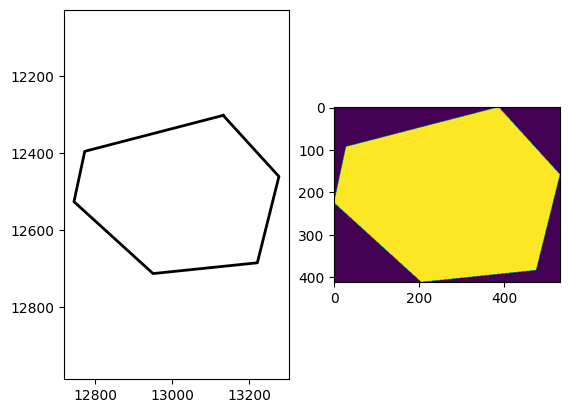

In [142]:
from wholeslidedata.samplers.patchlabelsampler import SegmentationPatchLabelSampler
wsa = WholeSlideAnnotation('/tmp/TCGA-21-5784-01Z-00-DX1.xml')
annotation = wsa.annotations[0]

segmentation_patch_label_sampler= SegmentationPatchLabelSampler()
segmentation_label = patch_label_sampler.sample(wsa=wsa, point=annotation.center, size=annotation.size, ratio=1)

fig, axes = plt.subplots(1,2)
plot_annotations([annotation], ax=axes[0])
axes[0].invert_yaxis()
axes[1].imshow(segmentation_label)
plt.show()

## Detection


:::{seealso}
The  <a href="../examples/tiger.html">TIGER Example</a> in which a detection task is done with the same data as used below
:::

In [68]:
!aws s3 cp --no-sign-request s3://tiger-training/wsirois/wsi-level-annotations/images/100B.tif /tmp
!aws s3 cp --no-sign-request s3://tiger-training/wsirois/wsi-level-annotations/annotations-tissue-cells-xmls/100B.xml /tmp

download: s3://tiger-training/wsirois/wsi-level-annotations/images/100B.tif to ../../../../../../../../../../../tmp/100B.tif
download: s3://tiger-training/wsirois/wsi-level-annotations/annotations-tissue-cells-xmls/100B.xml to ../../../../../../../../../../../tmp/100B.xml


In [125]:
wsa = WholeSlideAnnotation('/tmp/100B.xml', sample_label_names=['roi'])
roi = wsa.sampling_annotations[0]
from wholeslidedata.samplers.patchlabelsampler import DetectionPatchLabelSampler

In [132]:
detection_patch_sampler = DetectionPatchLabelSampler(max_number_objects=100, detection_labels='lymphocytes and plasma cells')

In [133]:
objects = np.array(detection_patch_sampler.sample(wsa,  roi.center, roi.size, ratio=1))

In [134]:
objects[objects[...,-1]>0].astype("int32")

array([[ 248,   89,  266,  107,    6,    1],
       [ 265,  867,  283,  885,    6,    1],
       [ 340,  343,  358,  361,    6,    1],
       [ 390,  766,  408,  784,    6,    1],
       [ 394,  792,  412,  810,    6,    1],
       [ 420,  353,  438,  371,    6,    1],
       [ 425,  331,  443,  349,    6,    1],
       [ 433,  319,  451,  337,    6,    1],
       [ 436, 1117,  454, 1135,    6,    1],
       [ 439,  336,  457,  354,    6,    1],
       [ 452,  308,  470,  326,    6,    1],
       [ 483,  375,  501,  393,    6,    1],
       [ 488, 1133,  506, 1151,    6,    1],
       [ 489,  405,  507,  423,    6,    1],
       [ 570,  408,  588,  426,    6,    1],
       [ 604,  673,  622,  691,    6,    1],
       [ 617,  501,  635,  519,    6,    1],
       [ 630,  459,  648,  477,    6,    1],
       [ 648,  341,  666,  359,    6,    1],
       [ 667,  468,  685,  486,    6,    1],
       [ 744,  331,  762,  349,    6,    1],
       [ 754,  709,  772,  727,    6,    1],
       [ 7